<p><strong>Perceptron theorem:</strong> If a linear discriminant exists that can separate the classes without error, the training procedure is guaranteed to find that line or plane.</p>

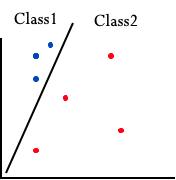

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, no_inputs, learning_rate=0.1):
        # learning rate
        self.__lrate__ = learning_rate
        
        # initialize weights. extra weight is theta (bias)
        # first element of weight vector is bias 
        self.__weights__ = np.random.rand(no_inputs + 1)

    def __predict__(self, input):
        # predict or compute output for a input
        
        # sum value, bias + dot product of weights and inputs
        summation = np.dot(input, self.__weights__[1:]) + self.__weights__[0]
        
        # step function as activation function
        if summation > 0:
            activation = 1
        else:
            activation = 0
        return activation

    def predict(self, inputs):
        
        # prediction vector for all inputs
        return np.array([self.__predict__(row) for row in inputs])

    def accuracy(self, inputs, target):
        # calculate accuracy percentage
        
        output = self.predict(inputs)
        sum = 0
        for o, t in zip(output, target):
            if o == t:
                sum += 1
        return 100*sum/len(output)

    def train(self, training_inputs, targets, max_epoch = 1000):
        # train the perceptron model 
        
        # accuracy at begining of training 
        accuracy = self.accuracy(training_inputs, targets)
        for _ in range(max_epoch):
            for inputs, target in zip(training_inputs, targets):
                # computed output
                prediction = self.__predict__(inputs)
                
                #new weights = old weights + learning rate * (target - output) * inputs
                self.__weights__[1:] += self.__lrate__ * (target - prediction) * inputs
                
                # update bais theta
                self.__weights__[0] += self.__lrate__ * (target - prediction) * 1

            # accuracy after training
            accuracy = self.accuracy(training_inputs, targets)
            
            # stop if model produce 100% accuracy, else next iteration
            if accuracy >= 100:
                break
        # return accuracy achieved and updated weights
        return accuracy, self.__weights__

In [ ]:
def draw_graph(line, xy, labels, limit = True):
    # set up figure and ax
    fig, ax = plt.subplots(figsize=(8, 8))
    
    #draw discriminat line
    ax.plot(line[0], line[1])
    
    # draw scatter plot
    ax.scatter(xy[:, 0], xy[:, 1], c=labels)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

<p>Generating points corresponding to x = 0 and x = 1<br />from equation bias + x * beta1 + y * beta2 = 0<br />y = -(bias + x * beta1)/beta2, beta2 &gt; 0</p>

In [ ]:
def get_line_points(bias, beta1, beta2):
    return([0,1], [-bias/beta2, -(bias+beta1)/beta2])

<p>Generate 100 random points in two dimenssions.<br />It has two classes</p>

In [ ]:
np.random.seed(12345)
data = np.random.rand(100, 2)
targets = [1 if row[0] < row[1] else 0 for row in data]

In [ ]:
# create an object of perceptron -- number of inputs node is 2
pctn = Perceptron(2)

# initial weights, randomly chosen
acc, weights = pctn.train(data, targets, 0)

line_points = get_line_points(weights[0], weights[1], weights[2])
draw_graph(line_points, data, targets)

Let's check discriminat line and accuracy after 5 iterations

In [ ]:
acc, weights = pctn.train(data, targets, 5)
line_points = get_line_points(weights[0], weights[1], weights[2])
print('accuracy = {}'.format(acc))
draw_graph(line_points, data, targets)

Let's check discriminat line and accuracy after a iteration

In [ ]:
acc, weights = pctn.train(data, targets, 1)
line_points = get_line_points(weights[0], weights[1], weights[2])
print('accuracy = {}'.format(acc))
draw_graph(line_points, data, targets)

Let's check discriminat line and accuracy after 5 iterations

In [ ]:
acc, weights = pctn.train(data, targets, 5)
line_points = get_line_points(weights[0], weights[1], weights[2])
print('accuracy = {}'.format(acc))
draw_graph(line_points, data, targets)

Let's check discriminat line and accuracy after completion

In [ ]:
acc, weights = pctn.train(data, targets)
line_points = get_line_points(weights[0], weights[1], weights[2])
print('accuracy = {}'.format(acc))
draw_graph(line_points, data, targets)